In [1]:
#magic~
%matplotlib inline

#dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
city_data_load = "Resources/city_data.csv"
ride_data_load = "Resources/ride_data.csv"

In [5]:
#set up city dataframe
city_data_df = pd.read_csv(city_data_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [7]:
#set up ride dataframe
ride_data_df = pd.read_csv(ride_data_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [8]:
#determine number of !null columns/rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [9]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [10]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
sum(city_data_df["type"]=="Urban")

66

In [15]:
sum(city_data_df["type"]=="Rural")

18

In [16]:
#inspect ride dataframe
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [17]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [18]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:
#combine data into a single frame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
#Create separate df by city type
urban_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [22]:
#Count rides in each city by city type
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

In [24]:
#Get average fare in each city by city type
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

In [28]:
#Get average # of drivers
urban_avg_drivernum = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_drivernum = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivernum = rural_df.groupby(["city"]).mean()["driver_count"]
urban_avg_drivernum.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

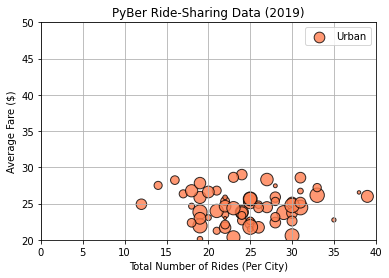

In [53]:
#urban city plot
x_axis1 = urban_ride_count
y_axis1 = urban_avg_fare
s1 = urban_avg_drivernum
plt.scatter(x_axis1, y_axis1, s = s1*3, alpha=0.8, label = "Urban", edgecolor = "black", color = "coral")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0, 40)
plt.ylim(20, 50)
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()

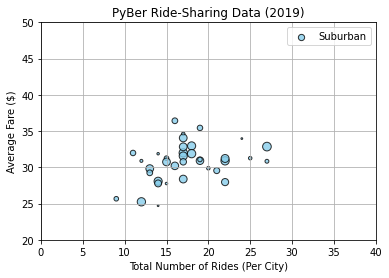

In [54]:
#suburban city plot
x_axis2 = suburban_ride_count
y_axis2 = suburban_avg_fare
s2 = suburban_avg_drivernum
plt.scatter(x_axis2, y_axis2, s = s2*3, alpha=0.8, label = "Suburban", edgecolor = "black", color = "skyblue")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0, 40)
plt.ylim(20, 50)
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()

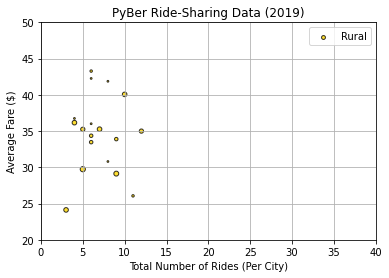

In [55]:
#rural city plot
x_axis3 = rural_ride_count
y_axis3 = rural_avg_fare
s3 = rural_avg_drivernum
plt.scatter(x_axis3, y_axis3, s = s3*3, alpha=0.8, label = "Rural", edgecolor = "black", color = "gold")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0, 40)
plt.ylim(20, 50)
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()

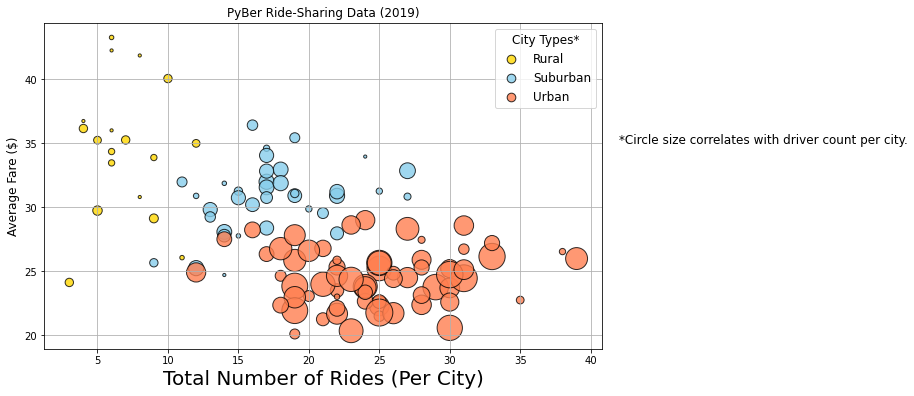

In [71]:
#Full scatter plot
plt.subplots(figsize=(10, 6))

plt.scatter(x_axis3, y_axis3, s = s3*10, alpha=0.8, label = "Rural", edgecolor = "black", color = "gold")
plt.scatter(x_axis2, y_axis2, s = s2*10, alpha=0.8, label = "Suburban", edgecolor = "black", color = "skyblue")
plt.scatter(x_axis1, y_axis1, s = s1*10, alpha=0.8, label = "Urban", edgecolor = "black", color = "coral")

#Create legend
lgnd = plt.legend(fontsize = "12", mode = "Expanded", scatterpoints=1, loc="best", title="City Types*")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#set qualities of the plot
plt.xlabel("Total Number of Rides (Per City)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 12)

#incorporate text note
plt.text(42, 35, "*Circle size correlates with driver count per city.", fontsize="12", wrap = True)
plt.savefig("analysis/Fig1.png")
plt.show()